In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "/home/vaish/projects/musicgenre/Dataset/spotify_dataset.csv"
df = pd.read_csv(url).iloc[:,1:]
df.columns = df.columns.str.strip()
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


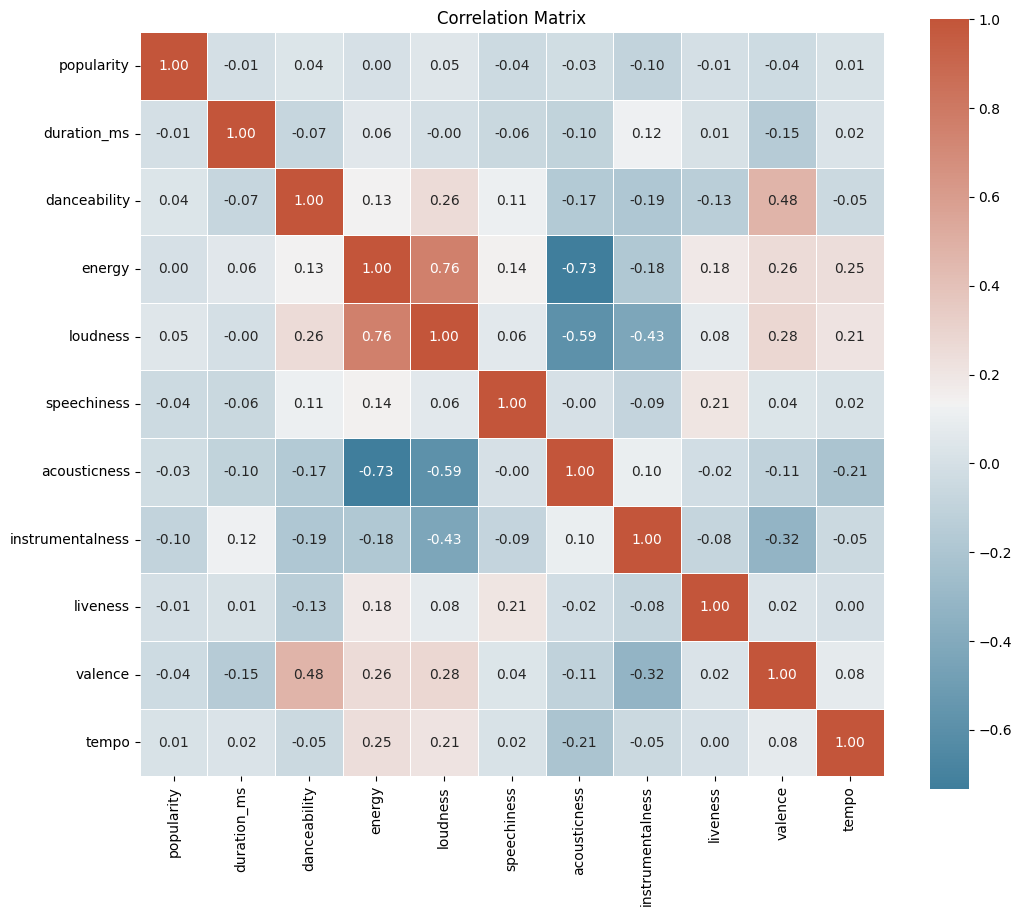

In [ ]:
#Correlation between the numerical features of the dataset using Seaborn’s heatmap function:

numeric_cols = ["popularity","duration_ms","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
numeric_df = df[numeric_cols]

plt.figure(figsize=(12, 10))
plt.title("Correlation Matrix") 
corr = numeric_df.corr()
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, annot=True, fmt=".2f", linewidths=.5, cmap=cmap, square = True)
plt.show()

Text(0, 0.5, 'Genre')

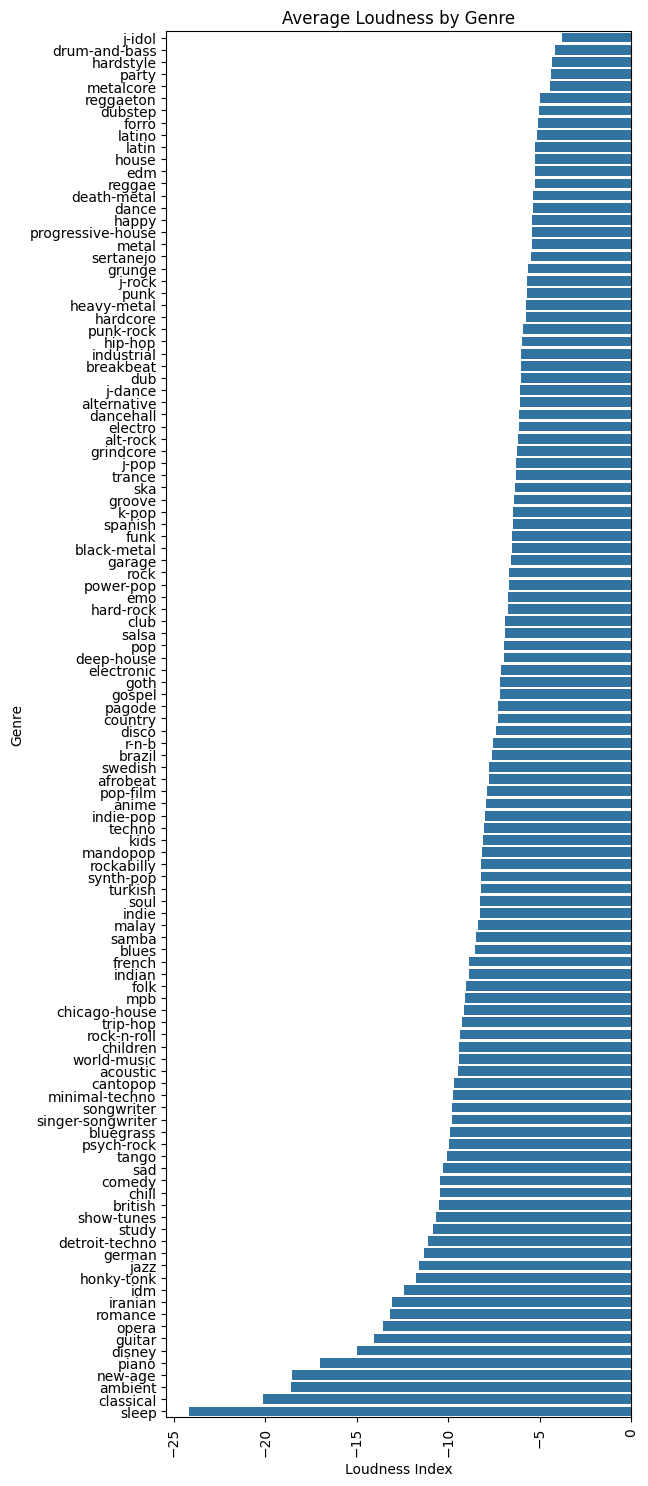

In [88]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
average_df = df.groupby('track_genre')[numeric_df.columns].mean()
average_df = average_df.sort_values(by='loudness', ascending=False)

plt.figure(figsize=(6, 18))
sns.barplot(x='loudness', y=average_df.index, data=average_df)
plt.xticks(rotation=90) 

plt.title('Average Loudness by Genre')
plt.xlabel('Loudness Index')
plt.ylabel('Genre')

In [ ]:
df = df.drop_duplicates()
non_sound_based_categories = ['british','french','german','swedish','spanish','indian','malay','turkish','world-music','gospel']
df = df.drop(df[df['track_genre'].isin(non_sound_based_categories)].index)
df = df.drop(columns = ['track_id','artists','album_name','track_name'])
df['explicit'] = df['explicit'].map({False: 0,True: 1})

# One-hot encoding
df = pd.get_dummies(df, columns=['key'], prefix = 'key', drop_first=True)
df = pd.get_dummies(df, columns=['time_signature'], prefix = 'meter', drop_first=True)

In [98]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

def perform_scaling(df, columns_to_scale, scaler_type):

    if scaler_type == 1:
        scaler = StandardScaler()
    elif scaler_type == 2:
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler_type. Use 1 for StandardScaler or 2 for MinMaxScaler.")

    scaled_data = scaler.fit_transform(df[columns_to_scale])
    scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
    df_scaled = pd.concat([df.drop(columns=columns_to_scale).reset_index(drop=True), scaled_df], axis=1)

    return df_scaled
  
numeric_cols = ["popularity","duration_ms","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
  
df = perform_scaling(df, numeric_cols, 1)

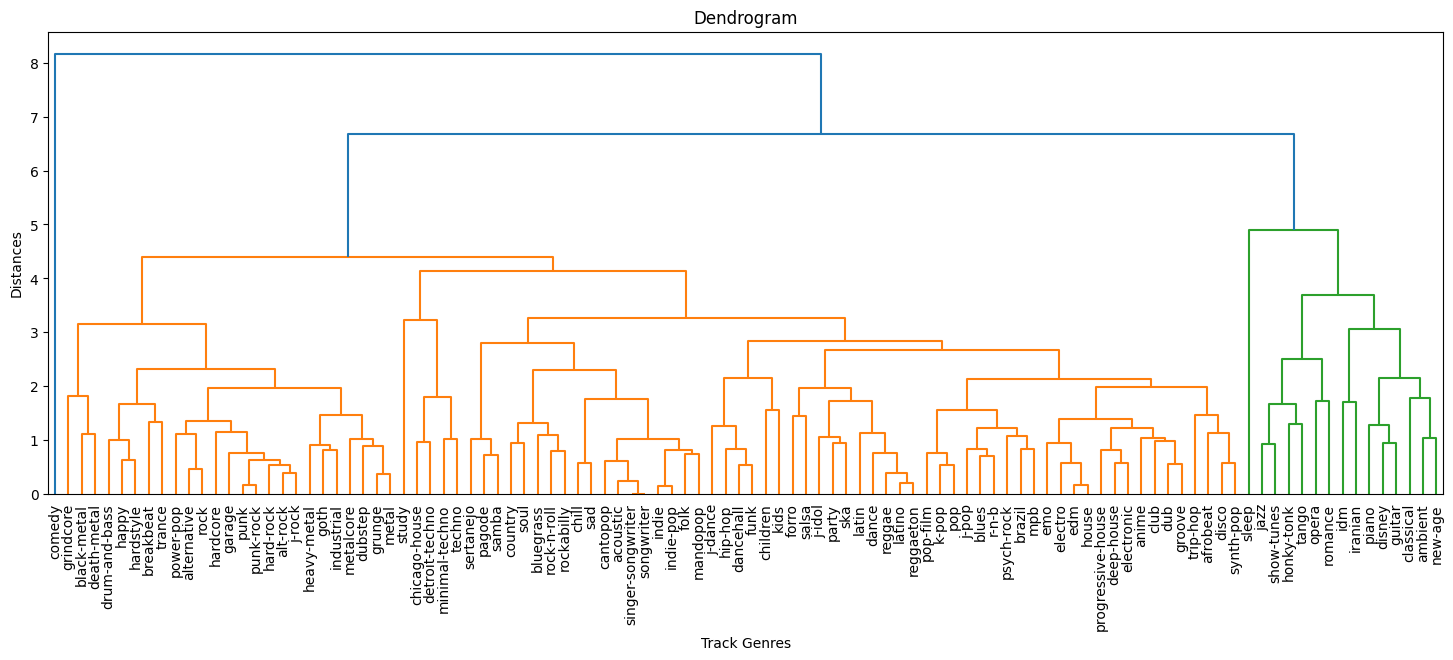

In [99]:
import scipy.cluster.hierarchy as sch

genres_average = df.groupby('track_genre').mean()
plt.figure(figsize=(18, 6))
dendrogram = sch.dendrogram(sch.linkage(genres_average, method='complete'), labels=genres_average.index)
plt.title('Dendrogram')
plt.xlabel('Track Genres')
plt.ylabel('Distances')
plt.tick_params(axis='x', labelsize=10)
plt.show()

In [ ]:
from scipy.cluster.hierarchy import fcluster

linkage_matrix = sch.linkage(genres_average, method='complete')

def perform_scaling(df, columns_to_scale, scaler_type):
    
    if scaler_type == 1:
        scaler = StandardScaler()
    elif scaler_type == 2:
        scaler = MinMaxScaler()
    else:
        raise ValueError("Invalid scaler_type. Use 1 for StandardScaler or 2 for MinMaxScaler.")

    scaled_data = scaler.fit_transform(df[columns_to_scale])
    scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale)
    df_scaled = pd.concat([df.drop(columns=columns_to_scale).reset_index(drop=True), scaled_df], axis=1)

    return df_scaled
  
numeric_cols = ["popularity","duration_ms","danceability","energy","loudness","speechiness","acousticness","instrumentalness","liveness","valence","tempo"]
  
df = perform_scaling(df, numeric_cols, 1)
threshold = 2

clusters = fcluster(linkage_matrix, threshold, criterion='distance')

genres_average['Cluster'] = clusters

pd.set_option('display.max_rows', 60)

cluster_dict = {}
for i, (cluster, category) in enumerate(zip(clusters, genres_average.index)):
    if cluster not in cluster_dict:
        cluster_dict[cluster] = []
    cluster_dict[cluster].append(category)

ordered_cluster_dict = dict(sorted(cluster_dict.items()))
  
ordered_cluster_dict 

{1: ['black-metal', 'death-metal', 'grindcore'],
 2: ['breakbeat', 'drum-and-bass', 'happy', 'hardstyle', 'trance'],
 3: ['alt-rock',
  'alternative',
  'dubstep',
  'garage',
  'goth',
  'grunge',
  'hard-rock',
  'hardcore',
  'heavy-metal',
  'industrial',
  'j-rock',
  'metal',
  'metalcore',
  'power-pop',
  'punk',
  'punk-rock',
  'rock'],
 4: ['chicago-house', 'detroit-techno', 'minimal-techno', 'techno'],
 5: ['study'],
 6: ['pagode', 'samba', 'sertanejo'],
 7: ['bluegrass', 'country', 'rock-n-roll', 'rockabilly', 'soul'],
 8: ['acoustic',
  'cantopop',
  'chill',
  'folk',
  'indie',
  'indie-pop',
  'mandopop',
  'sad',
  'singer-songwriter',
  'songwriter'],
 9: ['dancehall', 'funk', 'hip-hop', 'j-dance'],
 10: ['children', 'kids'],
 11: ['dance',
  'forro',
  'j-idol',
  'latin',
  'latino',
  'party',
  'reggae',
  'reggaeton',
  'salsa',
  'ska'],
 12: ['blues',
  'brazil',
  'j-pop',
  'k-pop',
  'mpb',
  'pop',
  'pop-film',
  'psych-rock',
  'r-n-b'],
 13: ['afrobeat'

In [102]:
consolidated_genres = {'agressive-fusion': ['dubstep', 'grunge', 'metal'],
                       'industrial': ['goth', 'heavy-metal', 'industrial'],
                       'punk-rock': ['alt-rock', 'garage', 'hard-rock', 'j-rock', 'punk', 'punk-rock'],
                       'hardstyle': ['happy', 'hardstyle'],
                       'disco-ska': ['disco', 'ska', 'synth-pop'],
                       'rock': ['alternative', 'rock'],
                       'anime': ['anime', 'club'],
                       'edm-house': ['deep-house', 'electronic', 'progressive-house'],
                       'edm': ['dub', 'edm', 'electro', 'groove', 'house'],
                       'j-dance': ['dancehall', 'j-dance'],
                       'funk-hip-hop': ['funk', 'hip-hop'],
                       'latin': ['dance', 'latin', 'latino', 'reggae', 'reggaeton'],
                       'pop': ['k-pop', 'pop', 'pop-film'],
                       'brazilian': ['brazil', 'mpb'],
                       'blues-rnb': ['blues', 'j-pop', 'r-n-b'],
                       'indie': ['folk', 'indie', 'indie-pop', 'psych-rock'],
                       'chill': ['chill', 'sad'],
                       'pagode-samba': ['pagode', 'samba', 'sertanejo'],
                       'country-soul': ['country', 'soul'],
                       'rock-n-roll': ['rock-n-roll', 'rockabilly'],
                       'chicago-house': ['chicago-house', 'detroit-techno'],
                       'jazz-tango': ['honky-tonk', 'jazz', 'tango'],
                       'vocal-pop': ['acoustic', 'cantopop', 'mandopop', 'singer-songwriter', 'songwriter'],
                       'disney': ['disney', 'guitar'],
                       'soundscape': ['ambient', 'new-age']}

genre_map = {old_genre: new_genre for new_genre, old_genres in consolidated_genres.items() for old_genre in old_genres}
df['track_genre'] = df['track_genre'].replace(genre_map)

In [110]:
from sklearn.preprocessing import LabelEncoder

X = df.drop("track_genre", axis=1).values
y = df["track_genre"].values

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

genres = label_encoder.classes_

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

In [ ]:
import tensorflow as tf
from tensorflow import keras

num_classes = len(label_encoder.classes_)
inputs = keras.Input(shape=(X_train.shape[1],))

nn_model = keras.Sequential([
    inputs,
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')])

sparse_topK_categorical_accuracy = keras.metrics.SparseTopKCategoricalAccuracy(k = 10)

nn_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=[sparse_topK_categorical_accuracy])

nn_model.fit(X_train, y_train, epochs=60, batch_size=128, validation_data=(X_test, y_test))

y_pred_nn = nn_model.predict(X_test)

Epoch 1/60
608/608 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 3.8402 - sparse_top_k_categorical_accuracy: 0.3679 - val_loss: 3.1623 - val_sparse_top_k_categorical_accuracy: 0.6572
Epoch 2/60
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.0273 - sparse_top_k_categorical_accuracy: 0.6930 - val_loss: 2.7672 - val_sparse_top_k_categorical_accuracy: 0.7530
Epoch 3/60
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.7193 - sparse_top_k_categorical_accuracy: 0.7712 - val_loss: 2.6143 - val_sparse_top_k_categorical_accuracy: 0.7958
Epoch 4/60
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.5874 - sparse_top_k_categorical_accuracy: 0.8055 - val_loss: 2.5225 - val_sparse_top_k_categorical_accuracy: 0.8147
Epoch 5/60
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4996 - sparse_top_k_categorical_accuracy: 0.8236 - val_loss: 2.4625 - val_sparse_top_k_categorical_accuracy: 0.8287
Epoch 6/60
608/608 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4393 - sparse_top_k_categorical_accuracy: 0.8344

In [117]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective='multi:softmax', num_class=num_classes, seed=42)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict_proba(X_test)

In [135]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
knn_model = KNeighborsClassifier(n_neighbors = 10)

knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict_proba(X_test)

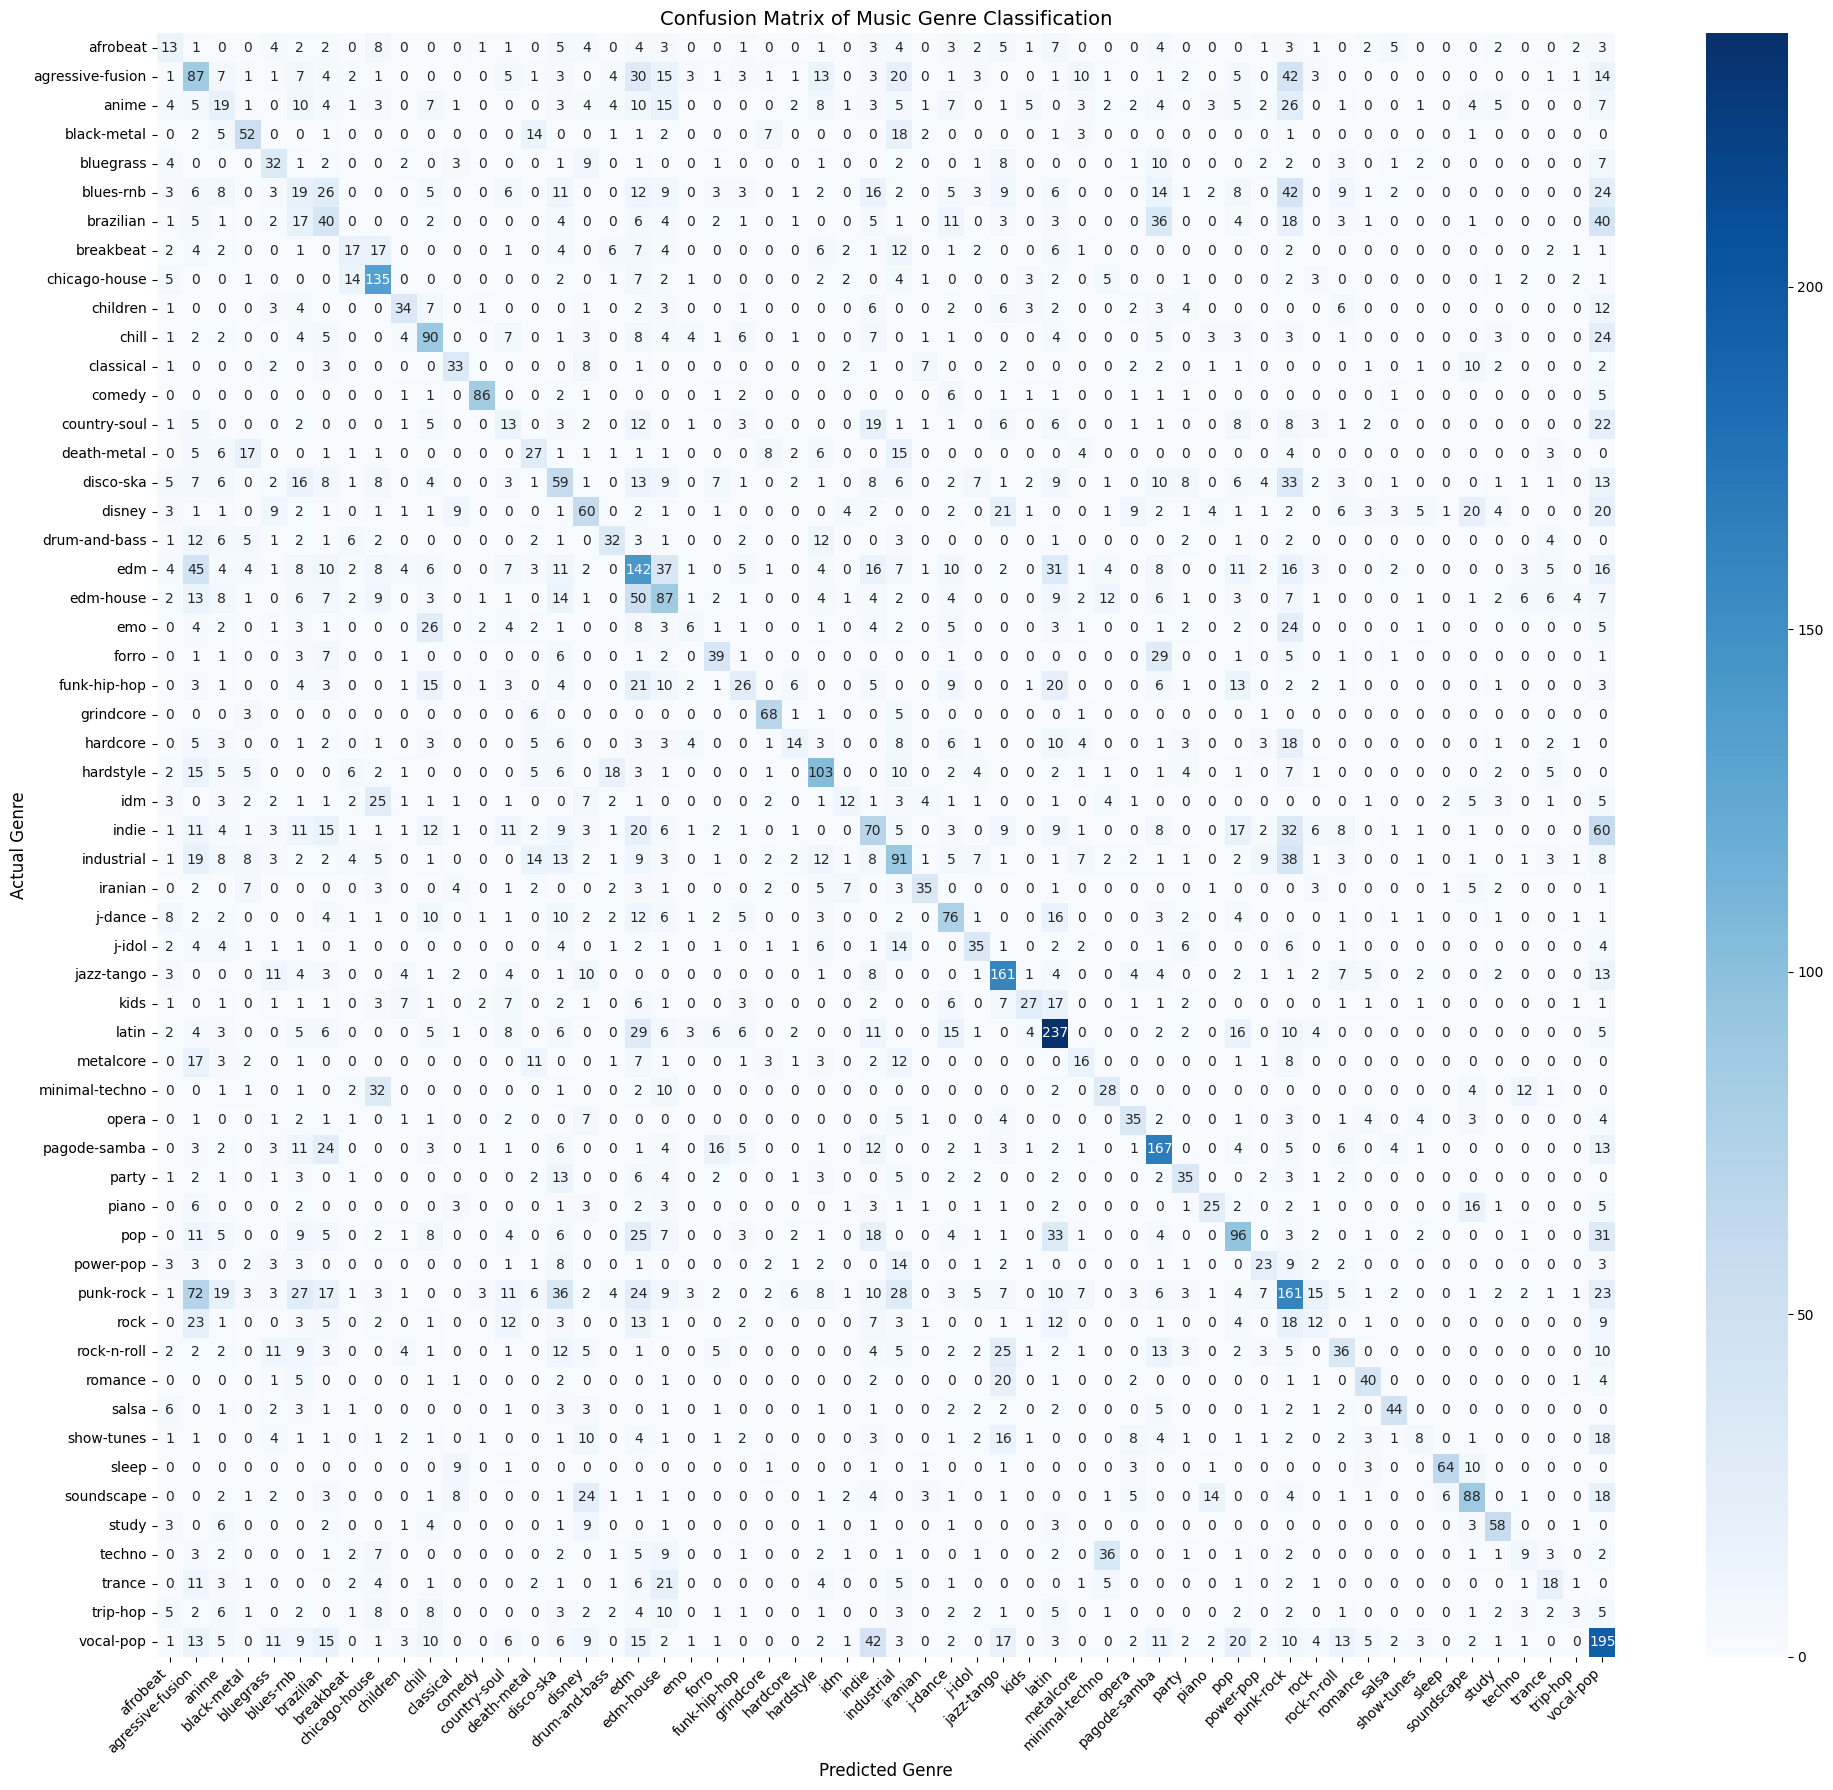

In [ ]:
cm = confusion_matrix(y_test,y_pred_knn.argmax(axis=1))

plt.figure(figsize=(20, 18))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=genres, yticklabels=genres)
# Set labels and title
plt.xlabel('Predicted Genre', fontsize=12)
plt.ylabel('Actual Genre', fontsize=12)
plt.title('Confusion Matrix of Music Genre Prediction (KNN)', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
dt_model = DecisionTreeClassifier()
svc_model = SVC(kernel='linear', probability=True)

estimators = [('knn', knn_model),
              ('logistic_reg', lr_model),
              ('decision_tree', dt_model),
              ('svc', svc_model)
             ]

ensemble_model = VotingClassifier(estimators=estimators,
                                  voting='soft',  
                                  n_jobs=-1)

ensemble_model.fit(X_train, y_train)

y_pred_ensemble = ensemble_model.predict_proba(X_test)

In [ ]:
def top_k_accuracy(y_test, y_pred, k):

    y_test = tf.cast(y_test, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    top_k_accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_pred, k=k)
    top_k_accuracy = round(np.mean(top_k_accuracy.numpy()) * 100, 2)

    # Calculate accuracy
    accuracy = tf.keras.metrics.sparse_top_k_categorical_accuracy(y_test, y_pred, k=1)
    accuracy = round(np.mean(accuracy.numpy()) * 100, 2)

    print(f"Top-{k} categorical accuracy: {top_k_accuracy}%")
    print(f"Accuracy: {accuracy}%")
    
print("Neural Network Results:")
top_k_accuracy(y_test, y_pred_nn, 3)
print("XGBoost Results:")
top_k_accuracy(y_test, y_pred_xgb, 3)
print("KNN Results:")
top_k_accuracy(y_test, y_pred_knn, 3)
print("Ensemble Results:")
top_k_accuracy(y_test, y_pred_ensemble, 3)

Neural Network Results:
Top-3 categorical accuracy: 66.43%
Accuracy: 41.53%
XGBoost Results:
Top-3 categorical accuracy: 71.91%
Accuracy: 45.94%
KNN Results:
Top-3 categorical accuracy: 67.65%
Accuracy: 38.47%
Ensemble Results:
Top-3 categorical accuracy: 61.86%
Accuracy: 38.01%


In [123]:
# Accuracy by genre
def accuracy_by_genre(y_test, y_pred):
    # Calculate confusion matrix for predicted genre labels
    matrix = tf.math.confusion_matrix(y_test, y_pred.argmax(axis=1))
    matrix = matrix.numpy()
    # Calculate genre-wise accuracy as percentage
    matrix_pred = matrix.diagonal()/matrix.sum(axis=1)*100

    # Create DataFrame for genre-wise accuracy
    genre_accuracy = pd.DataFrame({'accuracy': matrix_pred})

    # Create DataFrames for genres and predictions
    genres_labels = pd.DataFrame(genres)

    # Label genre & prediction columns for clarity
    genres_labels.columns = ['genre']

    # Combine genre labels & accuracy, sort by descending accuracy, reset index
    accuracy_by_genre = pd.concat([genres_labels, genre_accuracy], axis=1).sort_values(by='accuracy', ascending=False).reset_index(drop=True)

    return accuracy_by_genre

accuracy_by_genre(y_test, y_pred_nn)

,genre,accuracy
0,grindcore,91.282051
1,comedy,82.242991
2,sleep,81.151832
3,chicago-house,74.285714
4,study,72.282609
5,romance,71.270718
6,pagode-samba,69.811321
7,latin,68.010403
8,salsa,67.336683
9,iranian,65.405405
